In [1]:
#Project #1 - EDA of MTA data. Worked with Jenny and Jon
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mta_processing as mta

In [2]:
#Read data and create primary dataframe
week_nums = [190608, 190615,190622, 190629]
df = mta.get_data(week_nums)
df = mta.processTurnstiles(df)

In [3]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOF,DOF_SUMM,HOD,HODBIN,STATION_ID,ENTRIES_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,00:00:00,REGULAR,7080105,2398899,2019-06-01 00:00:00,Saturday,Weekend,0,"(-1, 3]",59 ST_456NQRW,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,04:00:00,REGULAR,7080137,2398904,2019-06-01 04:00:00,Saturday,Weekend,4,"(3, 7]",59 ST_456NQRW,32
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,08:00:00,REGULAR,7080161,2398937,2019-06-01 08:00:00,Saturday,Weekend,8,"(7, 11]",59 ST_456NQRW,24
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,12:00:00,REGULAR,7080276,2399025,2019-06-01 12:00:00,Saturday,Weekend,12,"(11, 15]",59 ST_456NQRW,115
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,16:00:00,REGULAR,7080520,2399084,2019-06-01 16:00:00,Saturday,Weekend,16,"(15, 19]",59 ST_456NQRW,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823338,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,05:00:00,REGULAR,2917,62,2019-06-28 05:00:00,Friday,Weekday,5,"(3, 7]",RIT-ROOSEVELT_R,0
823339,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,09:00:00,REGULAR,2917,62,2019-06-28 09:00:00,Friday,Weekday,9,"(7, 11]",RIT-ROOSEVELT_R,0
823340,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,13:00:00,REGULAR,2917,62,2019-06-28 13:00:00,Friday,Weekday,13,"(11, 15]",RIT-ROOSEVELT_R,0
823341,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,17:00:00,REGULAR,2917,62,2019-06-28 17:00:00,Friday,Weekday,17,"(15, 19]",RIT-ROOSEVELT_R,0


In [4]:
#Create dataframe with only weekday data
mask_weekday = (df['DOF'] == 'Monday') | (df['DOF'] == 'Tuesday') | (df['DOF'] == 'Wednesday') | (df['DOF'] == 'Thursday') | (df['DOF'] == 'Friday')

df_weekday = df[mask_weekday]
df_weekday

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOF,DOF_SUMM,HOD,HODBIN,STATION_ID,ENTRIES_DIFF
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-03,00:00:00,REGULAR,7081661,2399345,2019-06-03 00:00:00,Monday,Weekday,0,"(-1, 3]",59 ST_456NQRW,94
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-03,04:00:00,REGULAR,7081670,2399345,2019-06-03 04:00:00,Monday,Weekday,4,"(3, 7]",59 ST_456NQRW,9
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-03,08:00:00,REGULAR,7081722,2399400,2019-06-03 08:00:00,Monday,Weekday,8,"(7, 11]",59 ST_456NQRW,52
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-03,12:00:00,REGULAR,7081909,2399613,2019-06-03 12:00:00,Monday,Weekday,12,"(11, 15]",59 ST_456NQRW,187
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-03,16:00:00,REGULAR,7082197,2399662,2019-06-03 16:00:00,Monday,Weekday,16,"(15, 19]",59 ST_456NQRW,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823338,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,05:00:00,REGULAR,2917,62,2019-06-28 05:00:00,Friday,Weekday,5,"(3, 7]",RIT-ROOSEVELT_R,0
823339,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,09:00:00,REGULAR,2917,62,2019-06-28 09:00:00,Friday,Weekday,9,"(7, 11]",RIT-ROOSEVELT_R,0
823340,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,13:00:00,REGULAR,2917,62,2019-06-28 13:00:00,Friday,Weekday,13,"(11, 15]",RIT-ROOSEVELT_R,0
823341,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,17:00:00,REGULAR,2917,62,2019-06-28 17:00:00,Friday,Weekday,17,"(15, 19]",RIT-ROOSEVELT_R,0


In [70]:
#Rank stations by total entries
df_total_station = df.groupby(['STATION_ID']).agg({'ENTRIES_DIFF':'sum'}).sort_values(['ENTRIES_DIFF'])
#df_total_station.reset_index()
df_total_station = df_total_station[:-8:-1]
df_total_station

,ENTRIES_DIFF
STATION_ID,
GRD CNTRL-42 ST_4567S,3334584
34 ST-HERALD SQ_BDFMNQRW,2992110
14 ST-UNION SQ_456LNQRW,2485963
42 ST-PORT AUTH_1237ACENQRSW,2208218
FULTON ST_2345ACJZ,2158129
34 ST-PENN STA_ACE,2065539
TIMES SQ-42 ST_1237ACENQRSW,2030327


In [78]:
df_total_weekday = df_weekday.groupby(['STATION_ID']).agg({'ENTRIES_DIFF':'sum'}).sort_values(['ENTRIES_DIFF'])
df_top10_weekday = df_total_weekday.iloc[:-8:-1]
df_top10_weekday

,ENTRIES_DIFF
STATION_ID,
GRD CNTRL-42 ST_4567S,2900486
34 ST-HERALD SQ_BDFMNQRW,2427038
14 ST-UNION SQ_456LNQRW,2007073
FULTON ST_2345ACJZ,1892384
42 ST-PORT AUTH_1237ACENQRSW,1793158
34 ST-PENN STA_ACE,1725155
TIMES SQ-42 ST_1237ACENQRSW,1680343


In [77]:
top10 = list(df_total_station.index.values)
top10_weekday = list(df_top10_weekday.index.values)
top10
#top10_weekday

['GRD CNTRL-42 ST_4567S',
 '34 ST-HERALD SQ_BDFMNQRW',
 '14 ST-UNION SQ_456LNQRW',
 '42 ST-PORT AUTH_1237ACENQRSW',
 'FULTON ST_2345ACJZ',
 '34 ST-PENN STA_ACE',
 'TIMES SQ-42 ST_1237ACENQRSW']

Text(0, 0.5, 'Station ID')

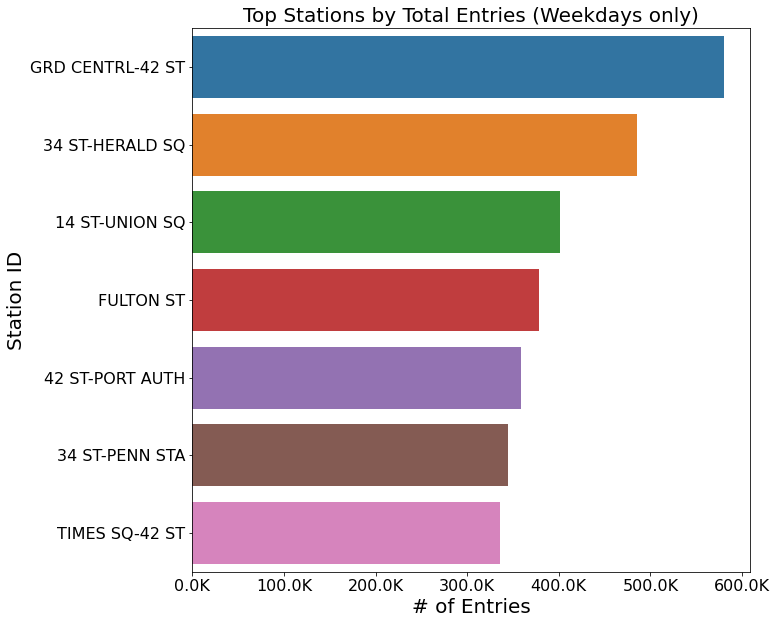

In [101]:
plt.figure(figsize=(10,10))
#plt.plot(df_total_station
p = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF', data=df_top10_weekday.reset_index())
#p.set_yticklabels(p.get_yticklabels(),size=16)
p.set_yticklabels(['GRD CENTRL-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ','FULTON ST','42 ST-PORT AUTH','34 ST-PENN STA','TIMES SQ-42 ST'],size=16)
xlabels = ['{}'.format(x) + 'K' for x in daily_plot.get_yticks()/1000]
p.set_xticklabels(xlabels, size=16)
p.set_title('Top Stations by Total Entries (Weekdays only)', size = 20)
p.set_xlabel('# of Entries',size=20)
p.set_ylabel('Station ID',size=20, rotation=90)


Text(0, 0.5, 'Station ID')

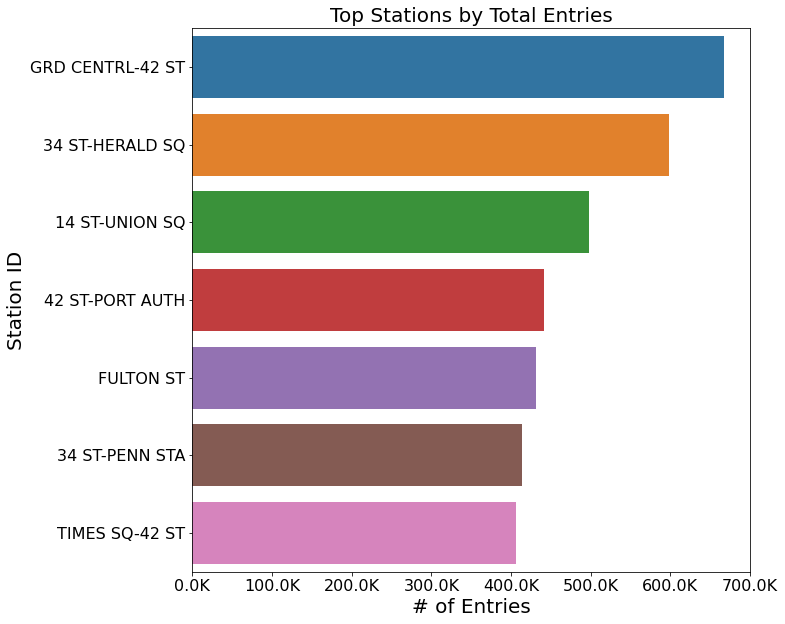

In [105]:
plt.figure(figsize=(10,10))
p = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF', data=df_total_station.reset_index())
#p.set_yticklabels(p.get_yticklabels(),size=16)
p.set_yticklabels(['GRD CENTRL-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ','42 ST-PORT AUTH','FULTON ST','34 ST-PENN STA','TIMES SQ-42 ST'],size=16)
xlabels = ['{}'.format(x) + 'K' for x in daily_plot.get_yticks()/1000]
p.set_xticklabels(xlabels, size=16)
p.set_title('Top Stations by Total Entries', size = 20)
p.set_xlabel('# of Entries',size=20)
p.set_ylabel('Station ID',size=20, rotation=90)


In [8]:
df_weekdays_top = df.groupby(['DOF','STATION_ID']).agg({'ENTRIES_DIFF':'sum'})
test = df_weekdays_top.sort_values('ENTRIES_DIFF', ascending=False).sort_index(level='DOF',sort_remaining=False)
test = test.reset_index()
test
#df_scored.sort_values('Score', ascending= False).sort_index(level='Index1', sort_remaining=False)


#['DOF']=='Friday'

#.unstack(level=0)

#df_weekdays_top['Monday']



,DOF,STATION_ID,ENTRIES_DIFF
0,Monday,GRD CNTRL-42 ST_4567S,549006
1,Monday,34 ST-HERALD SQ_BDFMNQRW,451672
2,Monday,14 ST-UNION SQ_456LNQRW,373321
3,Monday,42 ST-PORT AUTH_1237ACENQRSW,361710
4,Monday,FULTON ST_2345ACJZ,357512
...,...,...,...
3271,Sunday,BEACH 105 ST_AS,740
3272,Sunday,PATH WTC 2_1,688
3273,Sunday,BROAD CHANNEL_AS,470
3274,Sunday,ORCHARD BEACH_6,94


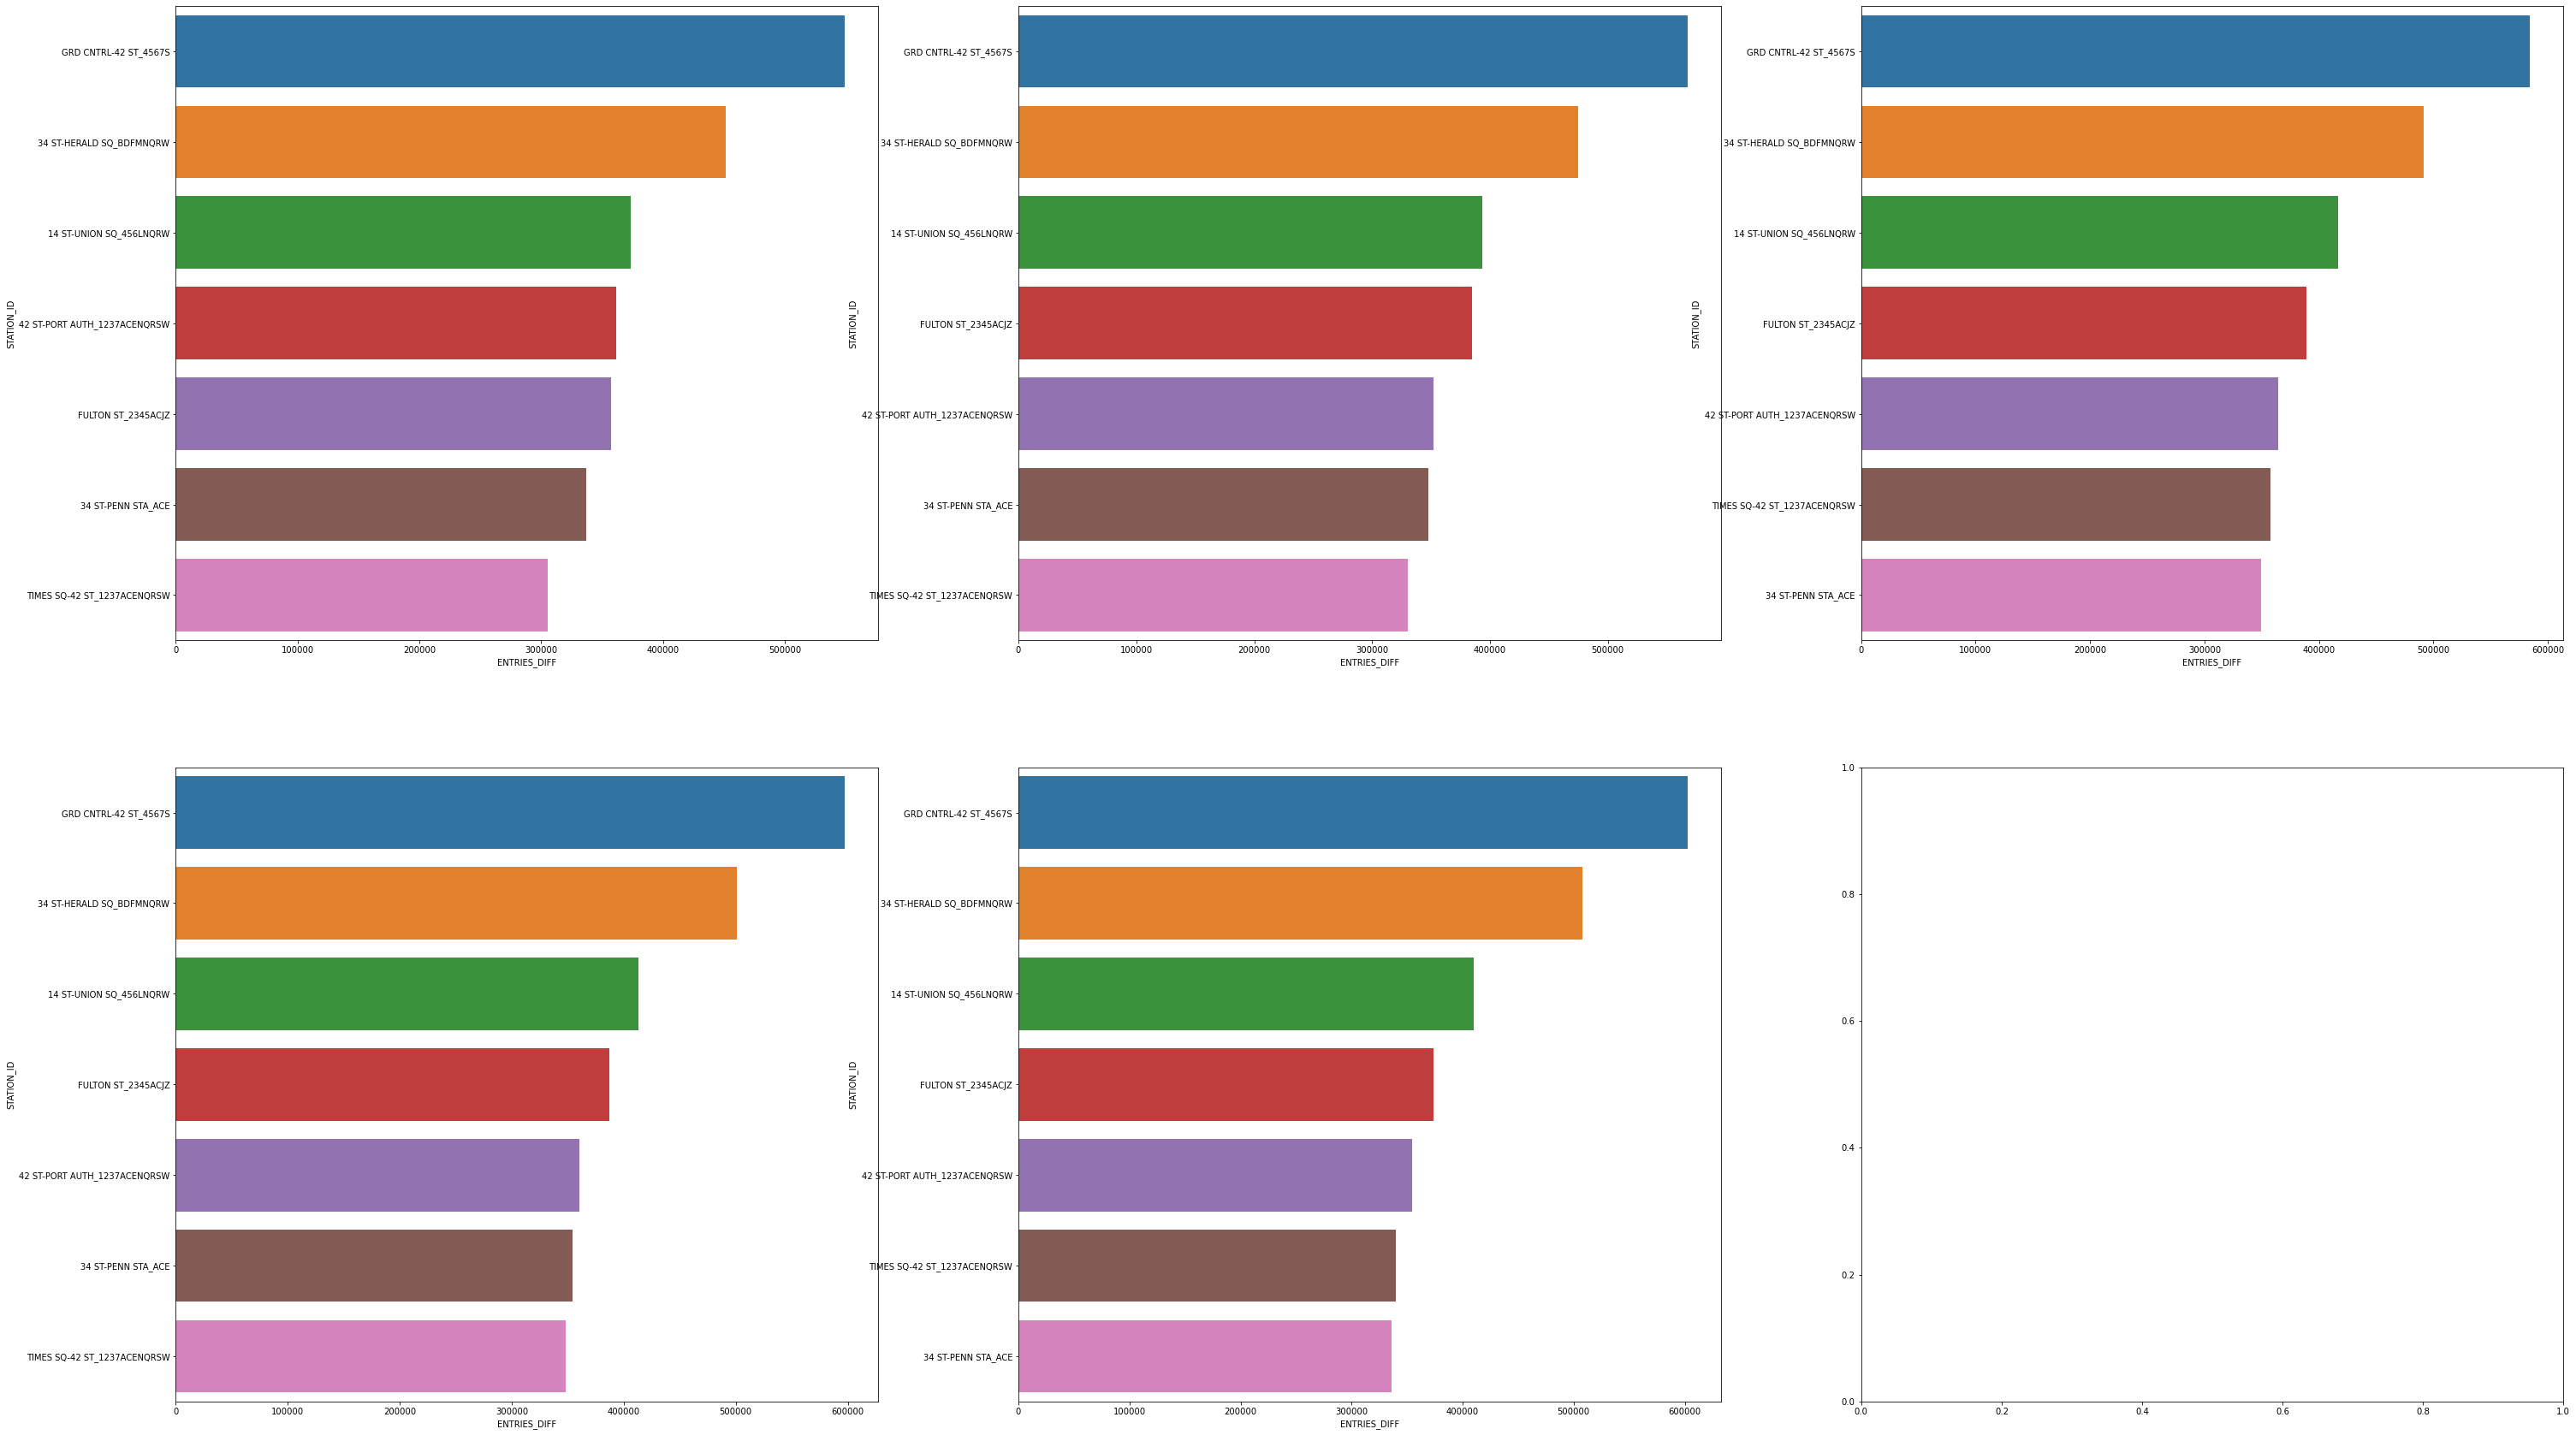

In [95]:
fig, axs = plt.subplots(figsize=(50,30),nrows=2,ncols=3)
plot_mon = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF',data = test[test['DOF']=='Monday'][0:7], ax=axs[0,0])
plot_tue = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF',data = test[test['DOF']=='Tuesday'][0:7], ax=axs[0,1])
plot_wed = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF',data = test[test['DOF']=='Wednesday'][0:7], ax=axs[0,2])
plot_thu = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF',data = test[test['DOF']=='Thursday'][0:7], ax=axs[1,0])
plot_fri = sns.barplot(y='STATION_ID',x='ENTRIES_DIFF',data = test[test['DOF']=='Friday'][0:7], ax=axs[1,1])

In [42]:
df_DOF = df[df['STATION_ID'].isin(top10)].groupby(['STATION_ID','DOF']).agg({'ENTRIES_DIFF':'sum'})
df_DOF.head(30)
df_DOF_sort = df_DOF.sort_values('DOF', ascending=True).sort_index(level='STATION_ID',sort_remaining=False)
df_DOF_sort = df_DOF_sort.reset_index()
df_DOF_sort

,STATION_ID,DOF,ENTRIES_DIFF
0,14 ST-UNION SQ_456LNQRW,Monday,373321
1,14 ST-UNION SQ_456LNQRW,Tuesday,393805
2,14 ST-UNION SQ_456LNQRW,Wednesday,416911
3,14 ST-UNION SQ_456LNQRW,Thursday,412944
4,14 ST-UNION SQ_456LNQRW,Friday,410092
5,14 ST-UNION SQ_456LNQRW,Saturday,269615
6,14 ST-UNION SQ_456LNQRW,Sunday,209275
7,34 ST-HERALD SQ_BDFMNQRW,Monday,451672
8,34 ST-HERALD SQ_BDFMNQRW,Tuesday,475034
9,34 ST-HERALD SQ_BDFMNQRW,Wednesday,491398


Text(0, 0.5, '# of Entries')

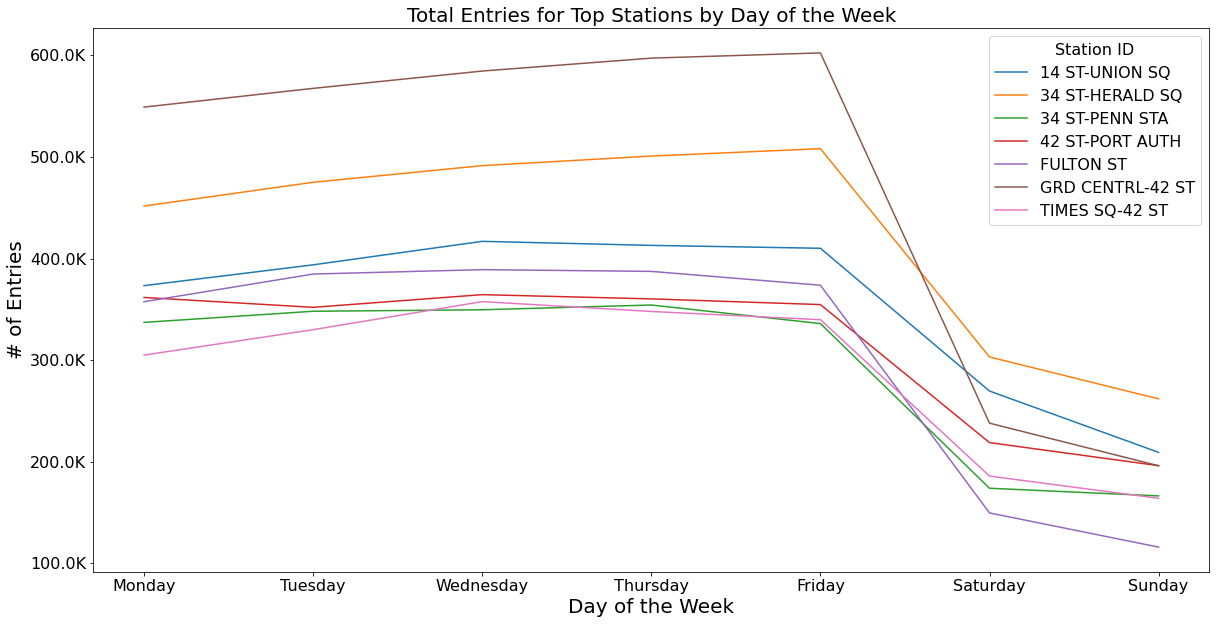

In [100]:
fig, axs = plt.subplots(figsize=(20,10))
daily_plot = sns.lineplot(x='DOF',y='ENTRIES_DIFF',hue='STATION_ID',data=df_DOF_sort)
plt.legend(['14 ST-UNION SQ','34 ST-HERALD SQ','34 ST-PENN STA','42 ST-PORT AUTH','FULTON ST','GRD CENTRL-42 ST','TIMES SQ-42 ST'], title='Station ID', fontsize=16,title_fontsize=16)
#legend = daily_plot.legend()
#legend.set_title("Station ID")
daily_plot.set_title("Total Entries for Top Stations by Day of the Week", size=20)
daily_plot.tick_params(labelsize=16)
ylabels = ['{}'.format(x) + 'K' for x in daily_plot.get_yticks()/1000]
daily_plot.set_yticklabels(ylabels)
daily_plot.set_xlabel("Day of the Week", size = 20)
daily_plot.set_ylabel("# of Entries", size = 20)

#(fontsize=13, title_fontsize='40')
#daily_plot._legend.set_title("Station ID")

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOF,DOF_SUMM,HOD,HODBIN,STATION_ID,ENTRIES_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,00:00:00,REGULAR,7080105,2398899,2019-06-01 00:00:00,Saturday,Weekend,0,"(-1, 3]",59 ST_456NQRW,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,04:00:00,REGULAR,7080137,2398904,2019-06-01 04:00:00,Saturday,Weekend,4,"(3, 7]",59 ST_456NQRW,32
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,08:00:00,REGULAR,7080161,2398937,2019-06-01 08:00:00,Saturday,Weekend,8,"(7, 11]",59 ST_456NQRW,24
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,12:00:00,REGULAR,7080276,2399025,2019-06-01 12:00:00,Saturday,Weekend,12,"(11, 15]",59 ST_456NQRW,115
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-06-01,16:00:00,REGULAR,7080520,2399084,2019-06-01 16:00:00,Saturday,Weekend,16,"(15, 19]",59 ST_456NQRW,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823338,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,05:00:00,REGULAR,2917,62,2019-06-28 05:00:00,Friday,Weekday,5,"(3, 7]",RIT-ROOSEVELT_R,0
823339,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,09:00:00,REGULAR,2917,62,2019-06-28 09:00:00,Friday,Weekday,9,"(7, 11]",RIT-ROOSEVELT_R,0
823340,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,13:00:00,REGULAR,2917,62,2019-06-28 13:00:00,Friday,Weekday,13,"(11, 15]",RIT-ROOSEVELT_R,0
823341,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,2019-06-28,17:00:00,REGULAR,2917,62,2019-06-28 17:00:00,Friday,Weekday,17,"(15, 19]",RIT-ROOSEVELT_R,0
